In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
from __future__ import print_function
from numpy import *
from scipy import *
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import scipy as sp
import cmocean
import glob
import seawater
""
from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools
)

%matplotlib inline


 Reference Salinity of
the local seawater sample is then determined from the
Practical Salinity according to the simple formula
SR = (35.16504/35) g kg–1  S.

In [4]:
path = '/results/SalishSea/hindcast.201812/'

months = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
days = ['01','15']

dicta_stor = []
sal_stor = []

nclist_Tgrid =[]
nclist_Tcarp = []

for m in range(0,len(months)):
    
    tmon = months[m]
    for d in range (0,len(days)):
        tday = days[d]
        tcarp = path + tday +tmon+'15/SalishSea_1d_*carp_T.nc'
        tgrid = path + tday +tmon+'15/SalishSea_1d_*grid_T.nc'
        nclist_Tgrid.append(tgrid)
        nclist_Tcarp.append(tcarp)
        

        


In [5]:
for i in range(0,len(nclist_Tcarp)):
    tg = glob.glob(nclist_Tgrid[i])
    t_grid = nc.Dataset(tg[0])
    tc = glob.glob(nclist_Tcarp[i])
    t_carp = nc.Dataset(tc[0])

    sal = t_grid.variables['vosaline'][:]
    dic = t_carp.variables['dissolved_inorganic_carbon'][:]
    ta = t_carp.variables['total_alkalinity'][:]
    low_salmask = np.where(sal<20)

    low_sal=sal[low_salmask]
    low_dic=dic[low_salmask]
    low_ta =ta[low_salmask]
    low_dicta = low_dic/low_ta
    dicta_stor.append(low_dicta)  
    sal_stor.append(low_sal)

In [6]:
# size(sal_stor[1])



In [7]:
# for i in range(0,len(nclist_Tcarp))
#     t_nc = nclist_Tcarp[i]
#     t_nc2 = nclist_Tgrid[i]
#     w = glob.glob(t_nc)
#     w2 = glob.glob(t_nc2)
#     print(w[0])
#     print(w2[0])
#     t_carp = nc.Dataset(w[0])
#     t_grid = nc.Dataset(w2[0])

In [8]:
print(t_carp)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    name: SalishSea_1d_20151211_20151220
    description: auxilary variables
    title: auxilary variables
    Conventions: CF-1.6
    timeStamp: 2019-Jan-04 02:15:07 GMT
    uuid: 4a4b875a-3494-43ed-aa08-3a03f47955f0
    dimensions(sizes): axis_nbounds(2), x(398), y(898), nvertex(4), deptht(40), time_counter(1)
    variables(dimensions): float32 nav_lat(y,x), float32 nav_lon(y,x), float32 bounds_lon(y,x,nvertex), float32 bounds_lat(y,x,nvertex), float32 area(y,x), float32 deptht(deptht), float32 deptht_bounds(deptht,axis_nbounds), float32 PAR(time_counter,deptht,y,x), float64 time_centered(time_counter), float64 time_centered_bounds(time_counter,axis_nbounds), float64 time_counter(time_counter), float64 time_counter_bounds(time_counter,axis_nbounds), float32 sigma_theta(time_counter,deptht,y,x), float32 e3t(time_counter,deptht,y,x), float32 dissolved_inorganic_carbon(time_counter,deptht,y,x), float32

In [9]:
cols = ['#800000', '#e6194B', '#f58231', '#ffe119', '#bfef45',\
        '#3cb44b','#469990', '#42d4f4', '#4363d8', '#000075', '#911eb4', '#f032e6']

# for j in range(0,24):
#     w = int(j/2)
#     print(w)








In [10]:
w = np.concatenate((sal_stor[0], sal_stor[1]), axis=0)
bigsal = sal_stor[0]
bigdicta = dicta_stor[0]
for i in range(1,12):
    bigsal = np.concatenate((bigsal,sal_stor[i]),axis=0)
    bigdicta = np.concatenate((bigdicta,dicta_stor[i]),axis=0)

In [11]:
t = sal_stor[0]
print(size(t))
print(size(t)*12)
print(size(bigsal))

4990536
59886432
60197008


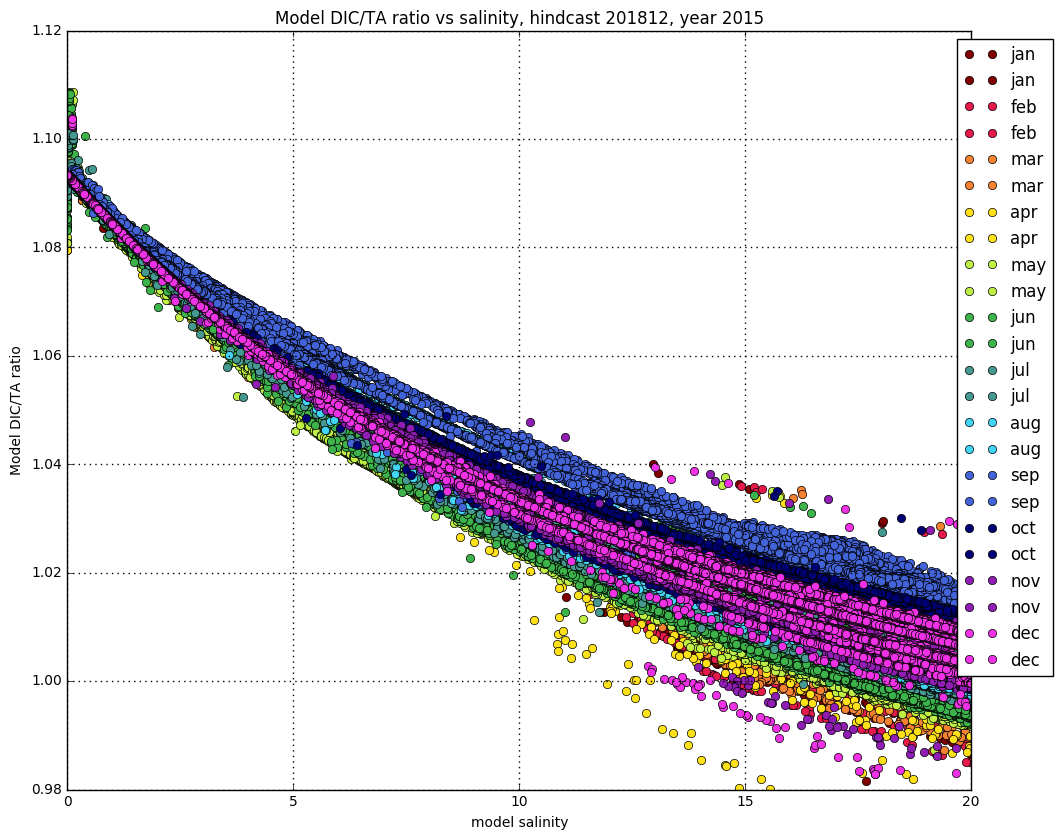

In [15]:
fig = plt.figure(figsize=(10,10))
from numpy.polynomial.polynomial import polyfit

for i in range(1,2):
    if i == 1:
        ax = fig.add_subplot(1,1,i)
        ax.grid(color='k', linestyle=':', linewidth=1)
        ax.set_ylim(0.98,1.12)
        for j in range(0,24):
            colind = int(j/2)
            #print(cols[colind])
            ax.plot(sal_stor[j],dicta_stor[j],marker = 'o', color = cols[colind], label = months[colind], linestyle = 'None')
        ax.set_xlabel('model salinity')
        ax.set_ylabel('Model DIC/TA ratio')
        plt.title('Model DIC/TA ratio vs salinity, hindcast 201812, year 2015')
        plt.legend(bbox_to_anchor=(1.1, 1.0))

        
        plt.tight_layout(rect=[0, 0.0, 1, 0.85])


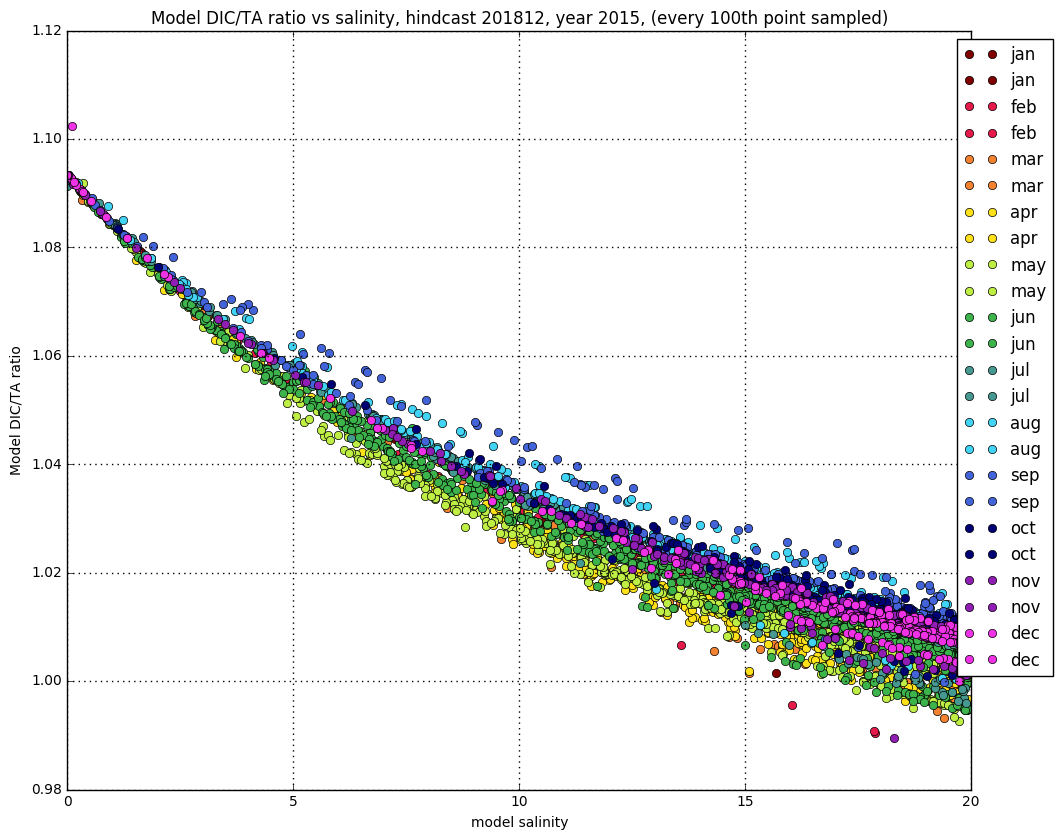

In [16]:
fig = plt.figure(figsize=(10,10))
from numpy.polynomial.polynomial import polyfit

for i in range(1,2):
    if i == 1:
        ax = fig.add_subplot(1,1,i)
        ax.grid(color='k', linestyle=':', linewidth=1)
        ax.set_ylim(0.98,1.12)
        for j in range(0,24):
            colind = int(j/2)
            #print(cols[colind])
            t_sal = sal_stor[j]
            t_dicta =dicta_stor[j]
            t_salsub = t_sal[::100].copy()
            t_dictasub = t_dicta[::100].copy()
            ax.plot(t_salsub,t_dictasub,marker = 'o', color = cols[colind], label = months[colind], linestyle = 'None')
        ax.set_xlabel('model salinity')
        ax.set_ylabel('Model DIC/TA ratio')
        plt.title('Model DIC/TA ratio vs salinity, hindcast 201812, year 2015, (every 100th point sampled)')
        plt.legend(bbox_to_anchor=(1.1, 1.0))

        
        plt.tight_layout(rect=[0, 0.0, 1, 0.85])


In [18]:
import cmocean as cm

cmap = cm.cm.matter

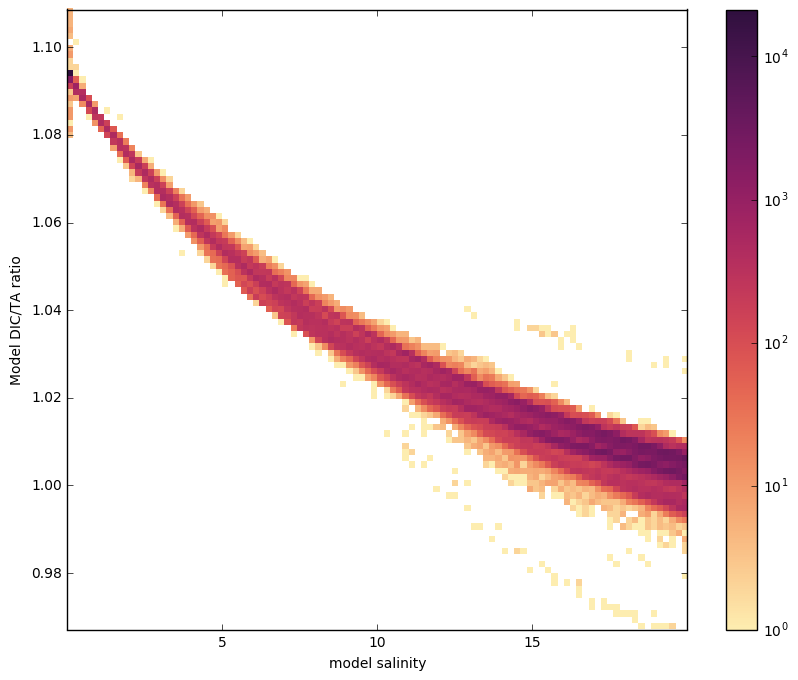

In [19]:
bigsal_nz = bigsal[bigsal!=0]
bigdicta_nz = bigdicta[bigsal!=0]

#fig, ax = plt.subplots()

tcmap = cm.cm.matter

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1,1,i)
h = ax.hist2d(bigsal_nz,bigdicta_nz, bins=100, norm = LogNorm(), cmap=cm.cm.matter)
plt.colorbar(h[3], ax=ax)
ax.set_xlabel('model salinity')
ax.set_ylabel('Model DIC/TA ratio')
